In [1]:
import tensorflow as tf
import numpy as np
import helpers as helpers

2024-04-11 11:30:37.715096: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-11 11:30:37.716016: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 11:30:37.748292: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 11:30:37.936907: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-11 11:30:38.977724: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.reuters.load_data(num_words=10000)
print(f"Train data of {len(train_data)} samples and Test data of {len(test_data)} samples")

Train data of 8982 samples and Test data of 2246 samples


## Explore some data points

In [3]:
samp_num = 12
print(f"The sample {samp_num} is length of {len(train_data[samp_num])} with elements:\n{train_data[samp_num]}")

The sample 12 is length of 65 with elements:
[1, 2, 81, 8, 16, 625, 42, 120, 7, 1679, 1928, 4, 270, 5, 4, 49, 27, 1299, 381, 2, 231, 81, 4, 120, 1343, 13, 2, 6, 343, 10, 2568, 334, 116, 13, 137, 5, 25, 335, 80, 28, 10, 96, 5, 272, 15, 90, 67, 7, 197, 2, 5132, 7, 2450, 2521, 7112, 6870, 9, 2, 573, 1259, 2, 75, 8, 17, 12]


In [4]:
word_index = tf.keras.datasets.reuters.get_word_index()
print(helpers.decode_to_words(train_data[samp_num], word_index))

? ? corp said it reached an agreement in principal covering the acquisition of the company by privately held ? financial corp the agreement calls for ? to make a self tender offer for all of its outstanding stock at a price of 22 dlrs per share in cash ? headquartered in los angeles develops manages and ? real estate ? also said reuter 3


In [5]:
x_train = helpers.vectorize_sequences(train_data)
x_test = helpers.vectorize_sequences(test_data)
print(
    f"Create arrays of {x_train.shape} as and example:\n",
    f"x_train length of {len(x_train[samp_num])} ",
    "and first 100 datapoints:\n",
    f"{x_train[samp_num][:100]}\n",
    f"it has  {np.count_nonzero(x_train[samp_num])} of ones"
)

Create arrays of (8982, 10000) as and example:
 x_train length of 10000  and first 100 datapoints:
 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0.]
 it has  49 of ones


In [6]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results

y_train_1 = to_one_hot(train_labels)
y_test_1 = to_one_hot(test_labels)  

In [7]:
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

In [8]:
assert y_train.all() == y_train_1.all()
assert y_test.all() == y_test_1.all()

In [9]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(46, activation="softmax")
    ]
)

In [10]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

## Validation - split data

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4209 - loss: 3.1810 - val_accuracy: 0.6200 - val_loss: 1.8117
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6488 - loss: 1.6432 - val_accuracy: 0.6840 - val_loss: 1.3467
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7327 - loss: 1.1942 - val_accuracy: 0.7310 - val_loss: 1.1783
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7806 - loss: 0.9824 - val_accuracy: 0.7580 - val_loss: 1.0726
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8218 - loss: 0.8129 - val_accuracy: 0.7910 - val_loss: 0.9995
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8618 - loss: 0.6645 - val_accuracy: 0.7950 - val_loss: 0.9534
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8732 - loss: 0.5768 - val_accuracy: 0.8140 - val_loss: 0.9185
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8990 - loss: 0.4752 - val_accuracy: 0.8150 - v

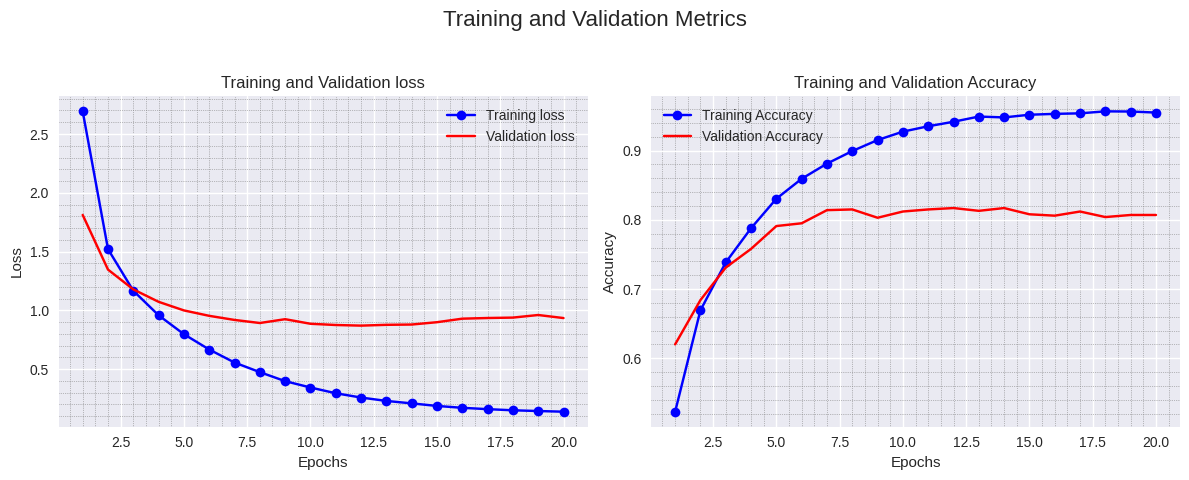

In [12]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

helpers.plot_loss_acc(history=history)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4158 - loss: 3.1581
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6587 - loss: 1.5991
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7447 - loss: 1.1728
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7979 - loss: 0.9642
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8262 - loss: 0.8053 
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8538 - loss: 0.6673
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8802 - loss: 0.5682
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8928 - loss: 0.4858
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9173 - loss: 0.3998
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7998 - loss: 0.8829


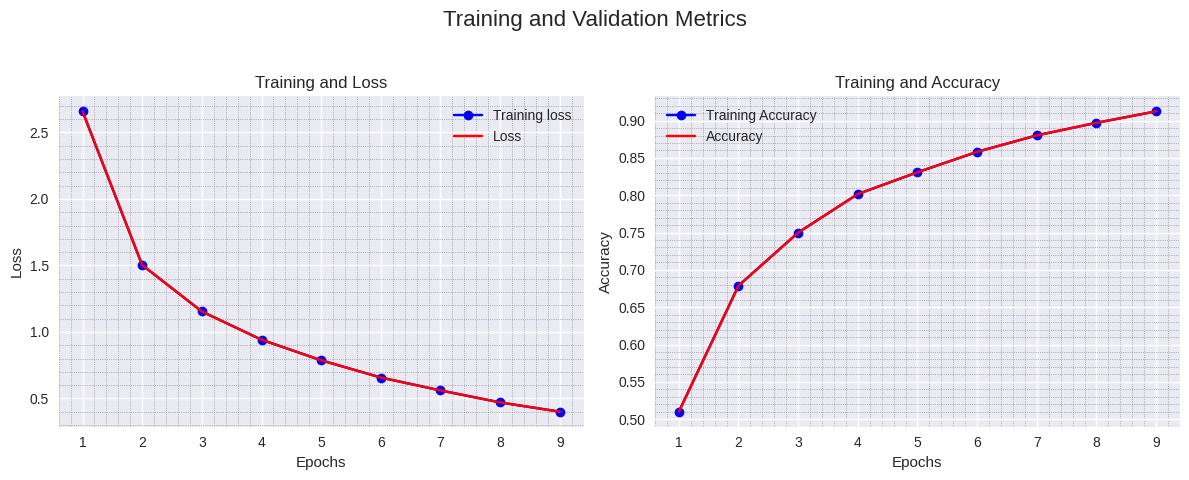

{'accuracy': [0.5100200176239014, 0.6788020730018616, 0.7499443292617798, 0.8016031980514526, 0.8307726383209229, 0.8581607937812805, 0.8802048563957214, 0.8970162272453308, 0.9123803377151489], 'loss': [2.6590025424957275, 1.5033268928527832, 1.1540796756744385, 0.9418364763259888, 0.7870497107505798, 0.6575362086296082, 0.5605922937393188, 0.47021278738975525, 0.40056800842285156]}
Results: [0.9123346209526062, 0.7911843061447144]


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(46, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512
)

results = model.evaluate(x_test, y_test)
helpers.plot_loss_acc(history=history)
print(history.history)
print(f"Results: {results}")

## Prediction

In [14]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(46,)
1.0000001
3
